# Finding best model with Gaussian Process Regression (GPR)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
# import own modules
import run_gpr
from gpr_alg import plot_data, prepare_data

# import external modules
import warnings
import pandas as pd
import numpy as np
import sklearn.gaussian_process as gp

## Find best model

We start be performing a grid search to find the best model for the given dataset. The ouput is saved in a file.

In [4]:
# Load statistics from model fitting with different kernels
store = pd.HDFStore('grid_search_stats_1D_100_iterations.h5')
model_stats = store['df']

model_stats

,kernel,stats,pred_mean,pred_cov
0,RBF: {'length_scale': 9.999999999999997e-06},0.614291,"[0.0, 0.0, 0.0, 1.4504751023330793, 1.39462576...","[1.0, 1.0, 1.0, 0.0005477224750655972, 0.00054..."
6,RationalQuadratic: {'length_scale': 0.19161022...,0.000136,"[1.5264904766549705, 1.516772457030612, 1.4914...","[0.0036136954557670965, 0.002122095195434687, ..."
7,RationalQuadratic: {'length_scale': 0.19164415...,0.000136,"[1.5264891545233183, 1.516772006225608, 1.4914...","[0.0036128283325284113, 0.002121781388651281, ..."
8,RationalQuadratic: {'length_scale': 0.19164306...,0.000136,"[1.5264891347241587, 1.5167719737203527, 1.491...","[0.0036127833460740705, 0.0021217021109364675,..."
9,RationalQuadratic: {'length_scale': 0.19157881...,0.000136,"[1.5264917222670817, 1.5167728804954095, 1.491...","[0.003614520371002662, 0.002122408643480014, 0..."
10,RationalQuadratic: {'length_scale': 0.19164307...,0.000136,"[1.5264891758043575, 1.5167719986996815, 1.491...","[0.003612816248171984, 0.002121747265620419, 0..."
11,RationalQuadratic: {'length_scale': 0.19164307...,0.000136,"[1.5264891240063605, 1.516771966804356, 1.4914...","[0.0036127743305296813, 0.002121699724300739, ..."
13,ExpSineSquared: {'length_scale': 1.20412509936...,0.000136,"[1.5264889395798775, 1.5167719011356269, 1.491...","[0.0036127439389061745, 0.0021217146091508407,..."
14,ExpSineSquared: {'length_scale': 1.20412525124...,0.000136,"[1.5264889386183427, 1.516771900802894, 1.4914...","[0.003612743296971644, 0.0021217143603635786, ..."
15,ExpSineSquared: {'length_scale': 1.20412526380...,0.000136,"[1.5264889385387619, 1.516771900775268, 1.4914...","[0.0036127432433157585, 0.0021217143398253504,..."


In [5]:
# Sort dataframe
model_stats = model_stats.sort_values(by=['stats'])
model_stats

,kernel,stats,pred_mean,pred_cov
9,RationalQuadratic: {'length_scale': 0.19157881...,0.000136,"[1.5264917222670817, 1.5167728804954095, 1.491...","[0.003614520371002662, 0.002122408643480014, 0..."
6,RationalQuadratic: {'length_scale': 0.19161022...,0.000136,"[1.5264904766549705, 1.516772457030612, 1.4914...","[0.0036136954557670965, 0.002122095195434687, ..."
11,RationalQuadratic: {'length_scale': 0.19164307...,0.000136,"[1.5264891240063605, 1.516771966804356, 1.4914...","[0.0036127743305296813, 0.002121699724300739, ..."
8,RationalQuadratic: {'length_scale': 0.19164306...,0.000136,"[1.5264891347241587, 1.5167719737203527, 1.491...","[0.0036127833460740705, 0.0021217021109364675,..."
10,RationalQuadratic: {'length_scale': 0.19164307...,0.000136,"[1.5264891758043575, 1.5167719986996815, 1.491...","[0.003612816248171984, 0.002121747265620419, 0..."
13,ExpSineSquared: {'length_scale': 1.20412509936...,0.000136,"[1.5264889395798775, 1.5167719011356269, 1.491...","[0.0036127439389061745, 0.0021217146091508407,..."
17,ExpSineSquared: {'length_scale': 1.20412519354...,0.000136,"[1.526488938983647, 1.5167719009291716, 1.4914...","[0.003612743540113311, 0.002121714454263833, 0..."
14,ExpSineSquared: {'length_scale': 1.20412525124...,0.000136,"[1.5264889386183427, 1.516771900802894, 1.4914...","[0.003612743296971644, 0.0021217143603635786, ..."
15,ExpSineSquared: {'length_scale': 1.20412526380...,0.000136,"[1.5264889385387619, 1.516771900775268, 1.4914...","[0.0036127432433157585, 0.0021217143398253504,..."
16,ExpSineSquared: {'length_scale': 1.20412528161...,0.000136,"[1.5264889384259561, 1.5167719007363019, 1.491...","[0.003612743167748848, 0.0021217143101037866, ..."


In [6]:
for row in range(model_stats.shape[0]):
    print(model_stats['kernel'].iloc[row])

RationalQuadratic: {'length_scale': 0.19157881572630137, 'alpha': 100000.00000000001}
RationalQuadratic: {'length_scale': 0.1916102235176488, 'alpha': 100000.00000000001}
RationalQuadratic: {'length_scale': 0.191643073012227, 'alpha': 100000.00000000001}
RationalQuadratic: {'length_scale': 0.19164306650065022, 'alpha': 100000.00000000001}
RationalQuadratic: {'length_scale': 0.1916430700394931, 'alpha': 92794.13071014827}
ExpSineSquared: {'length_scale': 1.2041250993620351e-05, 'periodicity': 100000.00000000001}
ExpSineSquared: {'length_scale': 1.204125193543867e-05, 'periodicity': 100000.00000000001}
ExpSineSquared: {'length_scale': 1.2041252512456446e-05, 'periodicity': 100000.00000000001}
ExpSineSquared: {'length_scale': 1.2041252638039158e-05, 'periodicity': 100000.00000000001}
ExpSineSquared: {'length_scale': 1.2041252816127835e-05, 'periodicity': 100000.00000000001}
RationalQuadratic: {'length_scale': 0.19164415862854803, 'alpha': 100000.00000000001}
RBF: {'length_scale': 9.999999

We discard all but option 5 because for all other kernels at least one parameter is very close to the specified bounds. Moreover, with the fith kernel the mean absolut error is still extremly low.

In [7]:
# Get model with smallest mean absolut error
mean_prediction =  model_stats['pred_mean'].iloc[4]
std_prediction = model_stats['pred_cov'].iloc[4]

print('Kernel: ' + str(model_stats['kernel'].iloc[4]))
print('Mean absolut error: ' + str(model_stats['stats'].iloc[4]))

Kernel: RationalQuadratic: {'length_scale': 0.1916430700394931, 'alpha': 92794.13071014827}
Mean absolut error: 0.00013606839866136668


In [8]:
# Make grid
grid = prepare_data.create_1D_grid(step_size=0.01)
# Create data
data = prepare_data.create_data(func_param=[1, grid], func_name='zhouetal')
# Scale data (i.e. normalize)
data_scaled, _ = prepare_data.rescale_data(data, type='standardization')
# Split data into test and training datasets
grid_train, grid_test, data_train, data_test = prepare_data.split_train_test_data(grid, data_scaled, train_perc=0.3)

<IPython.core.display.Javascript object>


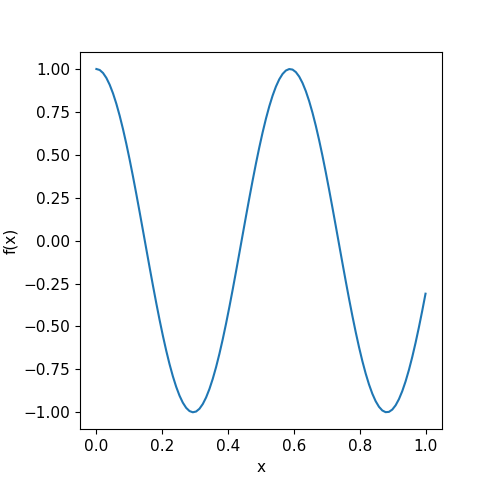

In [9]:
# Plot original data
plot_data.make_2D_plot(data, grid, y_label='f(x)')

<IPython.core.display.Javascript object>


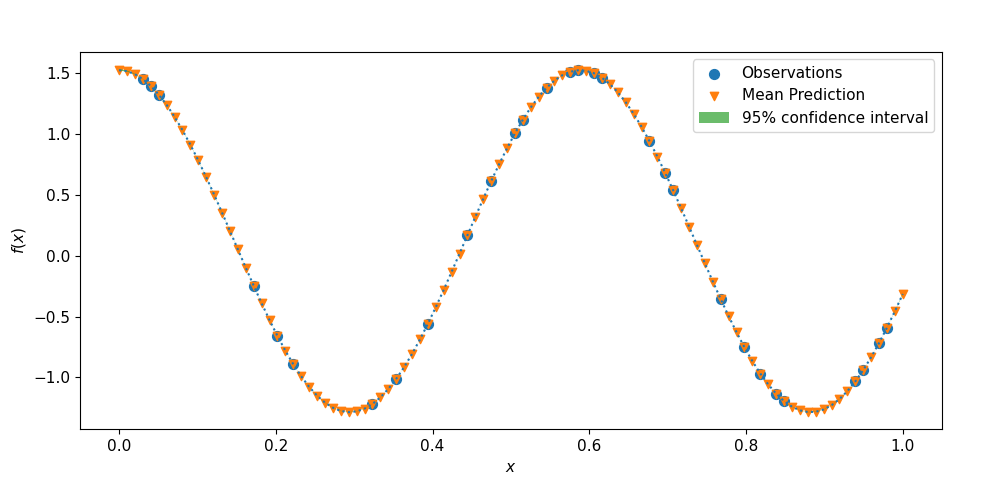

In [10]:
# Plot fitted data
plot_data.make_2D_conf_interval_plot(grid_values=grid, obs_values=data_scaled, grid_values_train=grid_train,
                                             obs_values_train=data_train, mean_pred=mean_prediction.flatten(),
                                             std_pred=std_prediction.flatten())

<IPython.core.display.Javascript object>


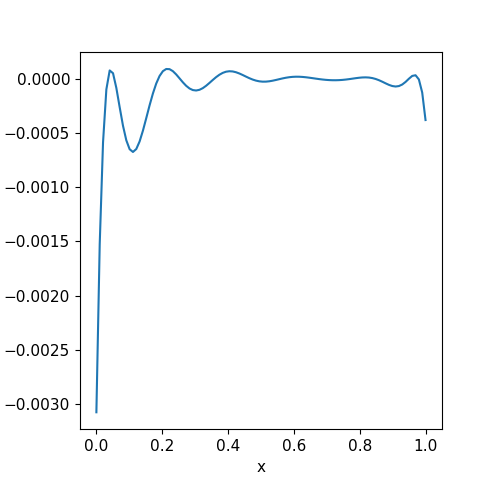

In [11]:
error = data_scaled.flatten() - mean_prediction.flatten()
# Plot error
plot_data.make_2D_plot(error, grid, y_label='error')

## Fit specific model